![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [4]:
import tensorflow as tf

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


# Task 2: The Dataset
### Import MNIST

In [7]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) =mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [14]:
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)
print("x_test.shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


### Plot an Image Example

In [19]:
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

<function matplotlib.pyplot.show>

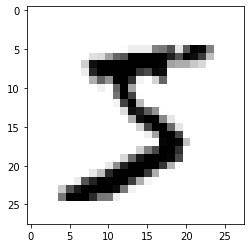

In [20]:
from matplotlib import pyplot  as plt
%matplotlib inline
plt.imshow(x_train[0],cmap='binary')
plt.show

In [22]:
print("lable:",y_train[0])

lable: 5


### Display Labels

In [25]:
print(set(y_train)) # all class we have in the date set

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [30]:
from tensorflow.keras.utils import to_categorical # for one hot encoding
y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)
                        

### Validated Shapes

In [31]:
print('y_train_encode',y_train_encode.shape)
print('y_test_encode',y_test_encode.shape)

y_train_encode (60000, 10)
y_test_encode (10000, 10)


### Display Encoded Labels

In [33]:
y_train_encode[0],y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

# Task 4: Neural Networks

## Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [35]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,28*28))
x_test_reshaped = np.reshape(x_test,(10000,28*28))

print('x_train_reshaped:',x_train_reshaped.shape)
print('x_test_reshaped:',x_test_reshaped.shape)

x_train_reshaped: (60000, 784)
x_test_reshaped: (10000, 784)


### Display Pixel Values

In [37]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [38]:
x_mean  = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

# z_score
x_train_norm = (x_train_reshaped - x_mean)/(x_std+epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)


### Display Normalized Pixel Values

In [43]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [181]:
model = Sequential([
                    tf.keras.Input(shape=(784,)), # input layer
                    Dense(units=128,activation='relu',name='layer1',kernel_regularizer=tf.keras.regularizers.L2(1e-5)),#Regalizaied avoid overfit
                    Dense(units=64,activation='relu',name='layer2',kernel_regularizer=tf.keras.regularizers.L2(1e-5)), # hiden layer
                    Dense(units=16,activation='relu',name='layer.add',kernel_regularizer=tf.keras.regularizers.L2(1e-5)),
                    Dense(units=10,activation='softmax',name='layer3') #output layer
                    
],name= 'my_model_MNIST'
    
)
model.summary()

Model: "my_model_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer.add (Dense)           (None, 16)                1040      
                                                                 
 layer3 (Dense)              (None, 10)                170       
                                                                 
Total params: 109,946
Trainable params: 109,946
Non-trainable params: 0
_________________________________________________________________


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [182]:
model.compile(
    # optimizer='sgd',#the batch size of SGD is 1
    # loss='categorical_crossentropy',
    # metrics=['accuracy']

    # version 2
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "my_model_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer.add (Dense)           (None, 16)                1040      
                                                                 
 layer3 (Dense)              (None, 10)                170       
                                                                 
Total params: 109,946
Trainable params: 109,946
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [184]:
model.fit(
    x_train_norm,y_train_encode,# x_train_reshaped accuracy  is 0.192
    epochs=20,
    batch_size=128 # default 32
)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0361 - accuracy: 0.9648
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0358 - accuracy: 0.9666
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0358 - accuracy: 0.9660
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0354 - accuracy: 0.9671
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0349 - accuracy: 0.9680
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0355 - accuracy: 0.9667
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0342 - accuracy: 0.9681
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0348 - accuracy: 0.9670
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0351 - accuracy: 0.9673
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0351 - accuracy: 0.9666

### Evaluating the Model

In [185]:
loss, accuracy = model.evaluate(x_test_norm,y_test_encode)

print('Test set accuracy',accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0433 - accuracy: 0.9552
Test set accuracy 95.52000164985657


# Task 8: Predictions

### Predictions on Test Set

In [186]:
preds = model.predict(x_test_norm)
print('shape of preds',preds.shape)

shape of preds (10000, 10)


### Plotting the Results

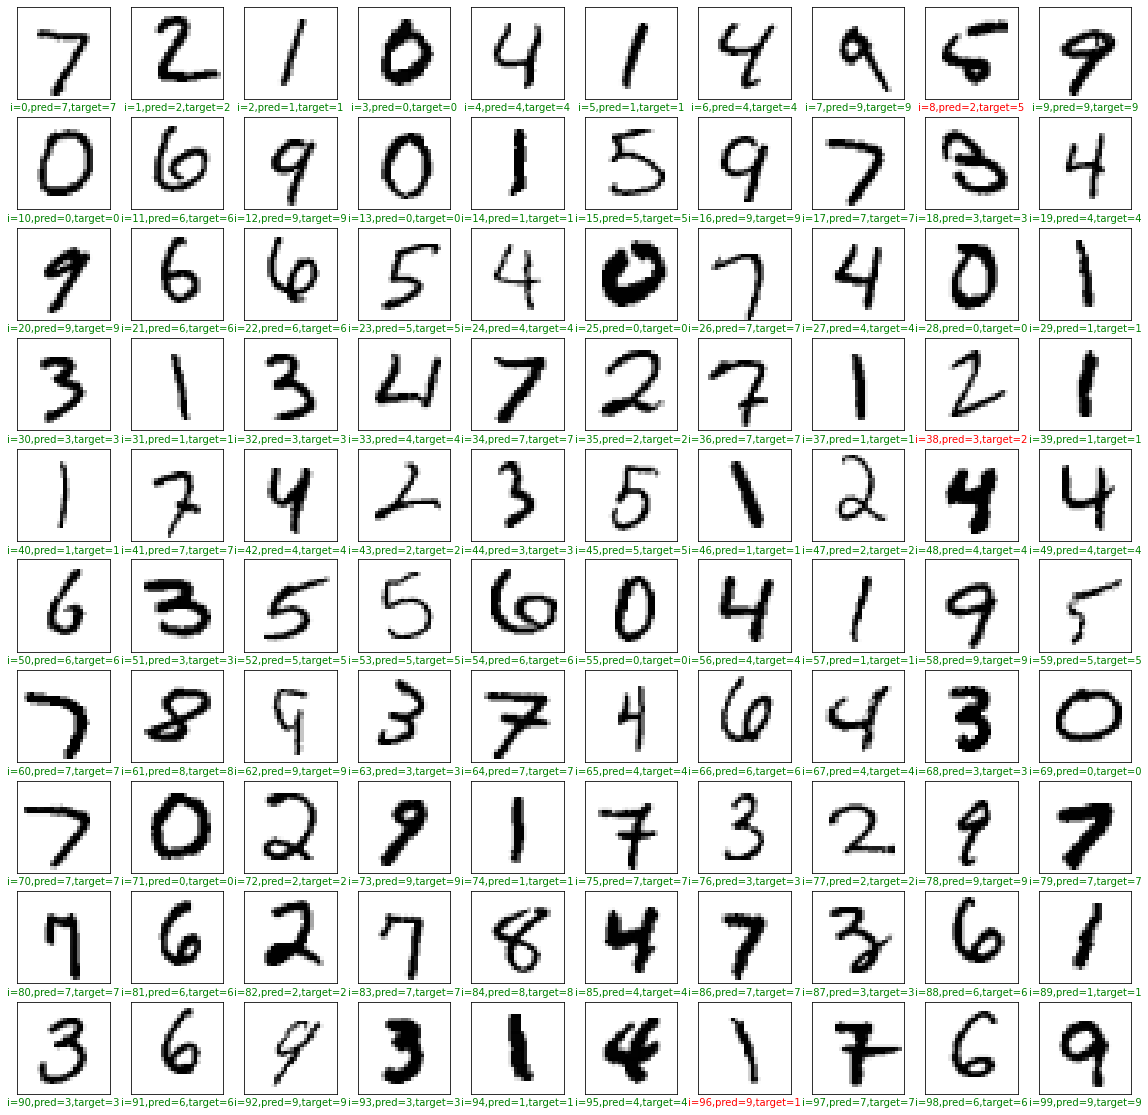

In [194]:
plt.figure(figsize=(20,20))

start_index = 0

for i in range(100):
  plt.subplot(10,10,i+1)
  plt.grid(False)
  plt.xticks([])# no need for x
  plt.yticks([])

  pred =np.argmax(preds[start_index + i])
  gt = y_test[start_index+i]

  col ='g'
  if pred != gt:
    col = 'r'
  
  # plt.xlabel('i={}, pred={}, gt={}',format(start_index+i, pred, gt),color=col) #error
  plt.xlabel('i={},pred={},target={}'.format(start_index+i, pred, gt),color=col)
  plt.imshow(x_test[start_index +i],cmap='binary')

plt.show()



In [198]:
preds[96]

array([0.00462256, 0.01677378, 0.02171278, 0.01276618, 0.03345729,
       0.00994568, 0.00326599, 0.00828011, 0.05172973, 0.8374459 ],
      dtype=float32)

<function matplotlib.pyplot.show>

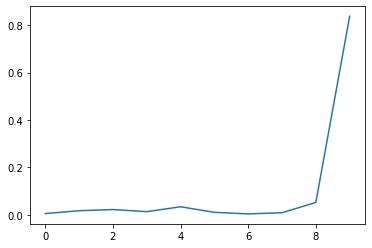

In [199]:
plt.plot(preds[96])
plt.show